# Aktienmarkt Analyseprojekt - LÖSUNGEN

Willkommen zu Deinem ersten Highlight! Dieses Projekt soll die erste Hälfte des Kurses abschließen, in der wir uns hauptsächlich mit den Bibliotheken beschäftigt haben, die wir in diesem Projekt benutzen werden. In der zweiten Hälfte wird es mehr um quantitative Tradingtechniken und -plattformen gehen.

Wir werden Akiendaten von ein paar Automobilkonzernen analysieren, vom 1. Januar 2012 bis zum 1. Januar 2017. Denk dran, dass dieses Projekt hauptsächlich zum Festigen Deiner Kenntnisse von matplotlib, pandas und numpy gedacht ist. Ziehe keine Anweisungen fürs Handeln aus der Analyse, die wir hier machen.

### Teil 0: Import

** Importiere die verschiedenen Bibliotheken, die Du brauchst - Du kannst immer hier her zurück kommen oder nach und nach importieren :) ** 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

____
## Teil 1: Datenerfassung

### Tesla Aktie(Ticker: TSLA im NASDAQ)

**  *Achtung! Nicht jeder Computer hat mit pandas_datareader offenen Zugang zum Download der Aktieninformationen (Firewalls, Admin Berechtigungen, etc...). Daher wird die csv-Datei für Tesla im Datenordner innerhalb dieses Ordners bereitgestellt. Sie heißt Tesla_Stock.csv. Benutze sie einfach mit read_csv!* **

** Benutze pandas_datareader um die historischen Aktieninformationen für Tesla vom 1. Januar 2012 bis zum 1. Januar 2017 zu bekommen. **



In [2]:
import pandas_datareader
import datetime

In [3]:
import pandas_datareader.data as web

In [4]:
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2017, 1, 1)
tesla = web.DataReader("TSLA", 'google', start, end)

In [5]:
tesla.head()

Open   High    Low  Close   Volume
Date                                           
2012-01-03  28.94  29.50  27.65  28.08   928052
2012-01-04  28.21  28.67  27.50  27.71   630036
2012-01-05  27.76  27.93  26.85  27.12  1005432
2012-01-06  27.20  27.79  26.41  26.89   687081
2012-01-09  27.00  27.49  26.12  27.25   896951

In [6]:
tesla.to_csv('Tesla_Stock.csv')

### Andere Automobilkonzerne

** Wiederhole die gleichen Schritte, um die Daten für Ford und GM(General Motors) zu erfassen. **

In [7]:
ford = web.DataReader("F", 'google', start, end)
gm = web.DataReader("GM",'google',start,end)

In [8]:
ford.head()

Open   High    Low  Close    Volume
Date                                            
2012-01-03  11.00  11.25  10.99  11.13  45709811
2012-01-04  11.15  11.53  11.07  11.30  79725188
2012-01-05  11.33  11.63  11.24  11.59  67877467
2012-01-06  11.74  11.80  11.52  11.71  59840605
2012-01-09  11.83  11.95  11.70  11.80  53981467

In [9]:
ford.to_csv('Ford_Stock.csv')

In [10]:
gm.head()

Open   High    Low  Close    Volume
Date                                            
2012-01-03  20.83  21.18  20.75  21.05   9321420
2012-01-04  21.05  21.37  20.75  21.15   7856752
2012-01-05  21.10  22.29  20.96  22.17  17884040
2012-01-06  22.26  23.03  22.24  22.92  18234608
2012-01-09  23.20  23.43  22.70  22.84  12091714

In [11]:
gm.to_csv('GM_Stock.csv')

## Teil 2: Die Daten visualisieren

** Zeit die Daten zu visualisieren. **

** Gehe die Schritte durch und erstelle die untenstehenden Diagramme selbst noch einmal gemäß den Anweisungen und Erklärungen.  **

____

** Erstelle dieses lineare Diagramm des Eröffnungspreises aller Aktien! Hinweis: Für die Legende kannst du die label-Parameter und pt.legend() benutzen **

In [2]:
# Code hier

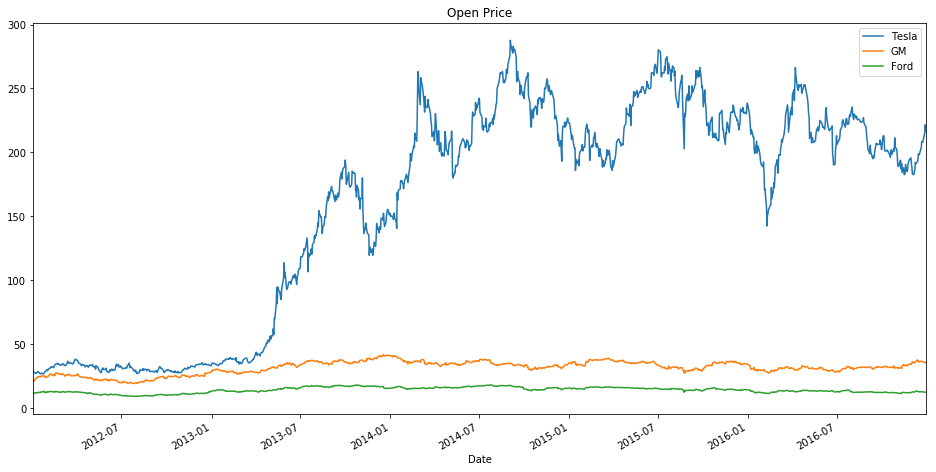

In [13]:
tesla['Open'].plot(label='Tesla',figsize=(16,8),title='Open Price')
gm['Open'].plot(label='GM')
ford['Open'].plot(label='Ford')
plt.legend()

____

** Stelle das täglich gehandelte Aktienvolumen dar. **

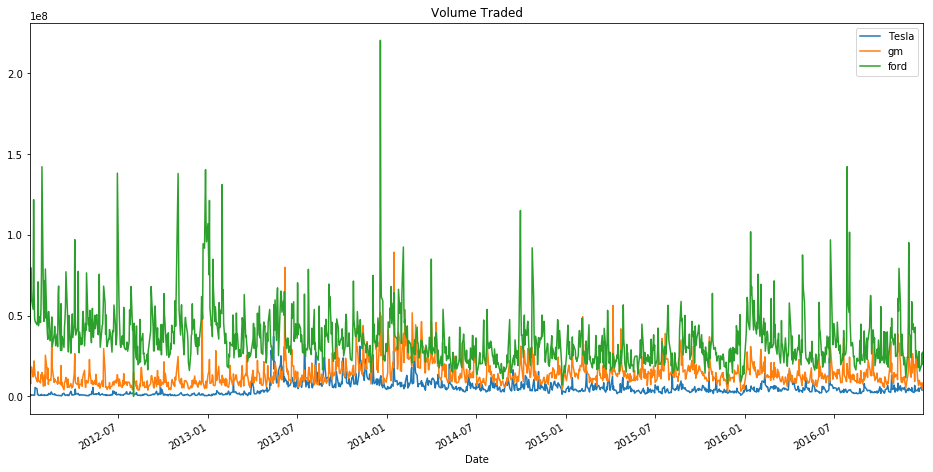

In [14]:
tesla['Volume'].plot(label='Tesla',figsize=(16,8),title='Volume Traded')
gm['Volume'].plot(label='gm')
ford['Volume'].plot(label='ford')
plt.legend()

** Interessant, sieht so aus als hätte Ford einen ziemlich großen Anstieg gegen Ende 2013 gehabt. Welches Datum hatte dieses maximale Handelvolumen von Ford? **

**Bonus: Was ist an diesem Tag passiert?**

In [15]:
ford['Volume'].argmax()

Timestamp('2013-12-18 00:00:00')

In [16]:
# Was passiert ist:
# http://money.cnn.com/2013/12/18/news/companies/ford-profit/
# https://www.usatoday.com/story/money/cars/2013/12/18/ford-2014-profit-warning/4110015/
# https://media.ford.com/content/dam/fordmedia/North%20America/US/2014/01/28/4QFinancials.pdf


____

** Die Visualisierung der Eröffnungspreiszeitreihe erweckt den Eindruck, dass Tesla die ganze Zeit ein wertvolleres Unternehmen war als GM und Ford. Aber um das wirklich zu verstehen, müssten wir uns den totalen Börsenwert der Firma ansehen, nicht nur den Aktienpreis. Unglücklicherweise enthalten unsere jetzigen Daten nicht die Information darüber, wie viele Aktien es gibt. Aber was wir als einfache Abschätzung machen können, um abzubilden, wie viel Geld ingesamt gehandelt wurde, ist die Volumenspalte mit dem Eröffnungspreis zu multiplizieren. Beachte, dass dies immer noch nicht der eigentliche Börsenwert ist, es ist nur eine Darstellung des Gesamtwert des gehandelten Geldes in dieser Zeitreihe. (z.B 100 Aktien zu je \$10 versus 100000 Aktien zu je \$1) **

** Erstelle eine neue Spalte für jedes Datenframe, die Du "Total Traded" nennst und die den Eröffnungspreis multipliziert mit dem Handelsvolumen darstellt. **

In [1]:
# Code hier

In [18]:
tesla['Total Traded'] = tesla['Open']*tesla['Volume']
ford['Total Traded'] = ford['Open']*ford['Volume']
gm['Total Traded'] = gm['Open']*gm['Volume']

** Stelle dieses "Total Traded" gegen den Zeitindex dar. **

In [3]:
# Code hier

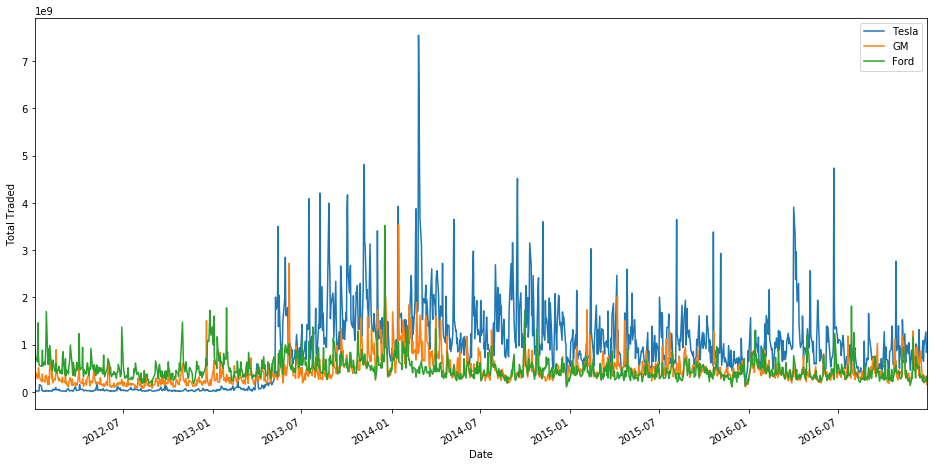

In [20]:
tesla['Total Traded'].plot(label='Tesla',figsize=(16,8))
gm['Total Traded'].plot(label='GM')
ford['Total Traded'].plot(label='Ford')
plt.legend()
plt.ylabel('Total Traded')

** Interessant, sieht so aus als wäre bei Tesla Anfang 2014 viel Geld gehandelt worden. Welches Datum war das und was ist passiert? **

In [21]:
tesla['Total Traded'].argmax()

Timestamp('2014-02-25 00:00:00')

In [22]:
# http://money.cnn.com/2014/02/25/investing/tesla-record-high/
# https://blogs.wsj.com/moneybeat/2014/02/25/tesla-shares-surge-on-morgan-stanley-report/
# https://www.washingtonpost.com/news/wonk/wp/2014/02/25/teslas-stock-is-up-644-why-it-may-not-last/
# http://www.cnbc.com/2014/02/25/tesla-soars-ford-falls-in-consumer-reports-study.html

____

** Üben wir die Darstellung von ein paar MAs (Moving Averages = Gleitende Durchschnitte). Stelle den MA50 und MA200 für GM dar. **

In [23]:
# Code hier

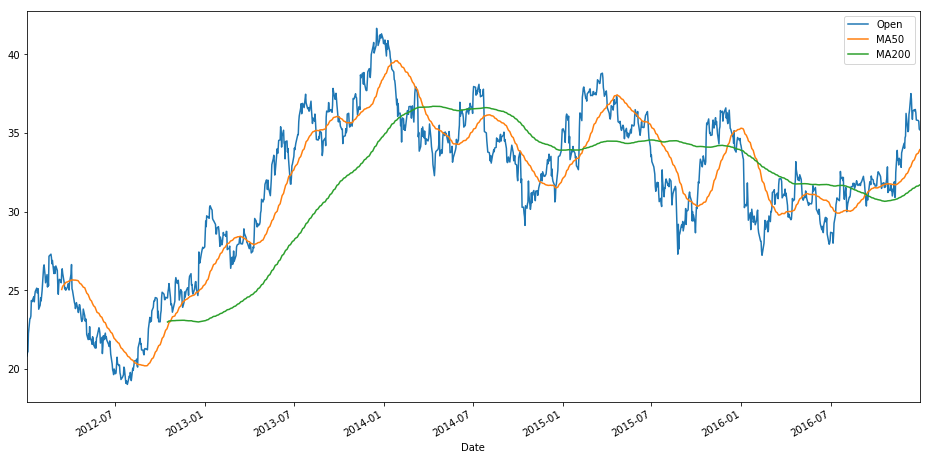

In [24]:
gm['MA50'] = gm['Open'].rolling(50).mean()
gm['MA200'] = gm['Open'].rolling(200).mean()
gm[['Open','MA50','MA200']].plot(label='gm',figsize=(16,8))

______

** Zum Schluss schauen wir uns noch an, ob es eine Beziehung zwischen diesen Aktien gibt. Immerhin haben sie alle eine Beziehung zur Automobilindustrie. Wir können das ganz einfach mithilfe eines Streumatrixdiagramms (scatter matrix plot) sehen. Importiere scatter_matrix von pandas.plotting und verwende es, um ein Streumatrixdiagramm für die Eröffnungspreise aller Aktien zu erstellen. Es kann sein, dass Du die Spalten in ein neues einzelnes Datenframe umformen musst. Hinweise und Informationen findest Du hier: https://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-matrix-plot **

In [25]:
from pandas.plotting import scatter_matrix

In [26]:
car_comp = pd.concat([tesla['Open'],gm['Open'],ford['Open']],axis=1)

In [27]:
car_comp.columns = ['Tesla Open','GM Open','Ford Open']

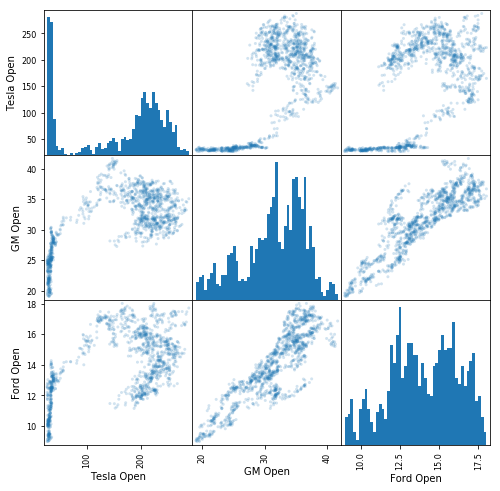

In [28]:
# Du kannst ein Semikolon benutzen, um die Achsenbeschriftungen zu entfernen.
scatter_matrix(car_comp,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

_____
### Bonusaufgabe Visualisierung (Achtung: Schwierig!)
**Erstellen wir nun eine Kerzenchart (candlestick chart)! Schau Dir das Video an, falls Du beim Erstellen dieser Visualisierung Probleme hast, es gibt eine ganze Menge an auszuführenden Schritten! Beziehe Dich auf das Video, um zu verstehen, wie man diese Grafik liest und interpretiert. Hinweise: https://matplotlib.org/examples/pylab_examples/finance_demo.html**

** Erstelle ein Kerzenchart für Ford im Januar 2012 (zu viele Daten sind nicht geeignet für ein Kerzenchart)**

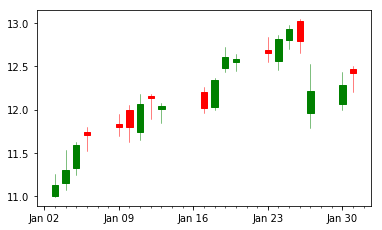

In [29]:
from matplotlib.finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY

# Setze den Index zurück, um eine Spalte von Januardaten zu bekommen
ford_reset = ford.loc['2012-01':'2012-01'].reset_index()

# Erstelle eine neue Spalte mit numerischen "date" Werten, die matplotlib benutzen kann
ford_reset['date_ax'] = ford_reset['Date'].apply(lambda date: date2num(date))
ford_values = [tuple(vals) for vals in ford_reset[['date_ax', 'Open', 'High', 'Low', 'Close']].values]

mondays = WeekdayLocator(MONDAY)        # größere Änderungen an Montagen
alldays = DayLocator()              # geringere Änderungen an allen Tagen
weekFormatter = DateFormatter('%b %d')  # z.B. 12. Jan
dayFormatter = DateFormatter('%d')      # z.B. 12

#Plotten
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)

candlestick_ohlc(ax, ford_values, width=0.6, colorup='g',colordown='r');

____
# Teil 3: Grundlegende Finanzanalyse

Nun ist es Zeit, sich auf ein paar zentrale Finanzkalkulationen zu konzentrieren. Dies wird Dir als Übergang zur zweiten Hälfte des Kurses dienen. Alles was Du tun musst ist den Anweisungen zu folgen. Es geht hauptsächlich darum zu üben, wie man mathematische Gleichungen oder Konzepte mit Python und Pandas in Code umwandelt, etwas, das wir oft tun werden, wenn wir mit quantitativen Daten arbeiten! Wenn Du Dich in diesem Abschnitt sehr verloren fühlst, mach Dir keine Sorgen! Geh einfach in die Lösungs-Vorlesung und sieh es als Code-Along. Du kannst so lernen, wie es Dir am besten gefällt!

Lass uns anfangen! 
___

## Tägliche Prozentänderung (Daily Percentage Change)

Zuerst werden wir die tägliche Prozentänderung berechnen. Die tägliche Prozentänderung ist wie folgt definiert:

$ r_t = \frac{p_t}{p_{t-1}} -1$

Diese Formel definiert r_t (Rendite(return) zum Zeitpunkt t) als Preis zum Zeitpunkt t geteilt durch den Preis zum Zeitpunkt t-1 (dem Vortag) minus 1. Im Prinzip sagt Dir das nur, wie viel Prozent Gewinn oder Verlust Du machen würdest, wenn du die Aktie an einem Tag kaufen und am nächsten verkaufen würdest. Obwohl das nicht unbedingt hilfreich ist, um die zukünftigen Aktienwerte vorauszusagen, ist es sehr hilfreich bei der Analyse der Volatilität der Aktie. Wenn die täglichen Rendite eine breite Verteilung hat, ist die Aktie unbeständiger (more volatile) von einem Tag zum nächsten. Berechnen wir die prozentualen Renditewerte und stellen sie dann als Histogramm dar. Dann entscheiden wir, welche Aktie die stabilste ist!

** Erstelle eine neue Spalte für jedes Datenframe und nenne sie "returns". Diese Spalte wird aus der Verkaufspreisspalte (Close price) berechnet. Es gib zwei Arten dafür: entweder eine einfache Berechnung mithilfe von .shift() nach der obigen Formel, oder mithilfe von pandas eingebauter Methode pct_change. **

In [30]:
# Methode 1: Mit shift()
tesla['returns'] = (tesla['Close'] / tesla['Close'].shift(1) ) - 1

In [31]:
tesla.head()

Open   High    Low  Close   Volume  Total Traded   returns
Date                                                                   
2012-01-03  28.94  29.50  27.65  28.08   928052   26857824.88       NaN
2012-01-04  28.21  28.67  27.50  27.71   630036   17773315.56 -0.013177
2012-01-05  27.76  27.93  26.85  27.12  1005432   27910792.32 -0.021292
2012-01-06  27.20  27.79  26.41  26.89   687081   18688603.20 -0.008481
2012-01-09  27.00  27.49  26.12  27.25   896951   24217677.00  0.013388

In [32]:
tesla['returns'] = tesla['Close'].pct_change(1)

In [33]:
tesla.head()

Open   High    Low  Close   Volume  Total Traded   returns
Date                                                                   
2012-01-03  28.94  29.50  27.65  28.08   928052   26857824.88       NaN
2012-01-04  28.21  28.67  27.50  27.71   630036   17773315.56 -0.013177
2012-01-05  27.76  27.93  26.85  27.12  1005432   27910792.32 -0.021292
2012-01-06  27.20  27.79  26.41  26.89   687081   18688603.20 -0.008481
2012-01-09  27.00  27.49  26.12  27.25   896951   24217677.00  0.013388

In [34]:
# Wiederhole das für die anderen Datenframes
ford['returns'] = ford['Close'].pct_change(1)
gm['returns'] = gm['Close'].pct_change(1)

In [35]:
ford.head()

Open   High    Low  Close    Volume  Total Traded   returns
Date                                                                    
2012-01-03  11.00  11.25  10.99  11.13  45709811  5.028079e+08       NaN
2012-01-04  11.15  11.53  11.07  11.30  79725188  8.889358e+08  0.015274
2012-01-05  11.33  11.63  11.24  11.59  67877467  7.690517e+08  0.025664
2012-01-06  11.74  11.80  11.52  11.71  59840605  7.025287e+08  0.010354
2012-01-09  11.83  11.95  11.70  11.80  53981467  6.386008e+08  0.007686

In [36]:
gm.head()

Open   High    Low  Close    Volume  Total Traded  MA50  MA200  \
Date                                                                          
2012-01-03  20.83  21.18  20.75  21.05   9321420  1.941652e+08   NaN    NaN   
2012-01-04  21.05  21.37  20.75  21.15   7856752  1.653846e+08   NaN    NaN   
2012-01-05  21.10  22.29  20.96  22.17  17884040  3.773532e+08   NaN    NaN   
2012-01-06  22.26  23.03  22.24  22.92  18234608  4.059024e+08   NaN    NaN   
2012-01-09  23.20  23.43  22.70  22.84  12091714  2.805278e+08   NaN    NaN   

             returns  
Date                  
2012-01-03       NaN  
2012-01-04  0.004751  
2012-01-05  0.048227  
2012-01-06  0.033829  
2012-01-09 -0.003490

** Jetzt erstelle ein Histogramm der Renditen der jeweiligen Unternehmen. Du kannst sie entweder einzeln machen oder sie aufeinander "stapeln" (stack). Welche Aktie ist die unbeständigste ("most volatile")? (Basierend auf der Varianz der täglichen Rendite werden wir Volatilität zukünftig noch detaillierter besprechen.) **

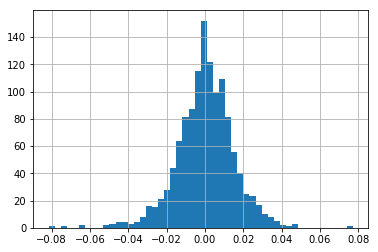

In [37]:
ford['returns'].hist(bins=50)

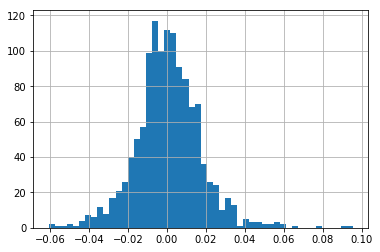

In [38]:
gm['returns'].hist(bins=50)

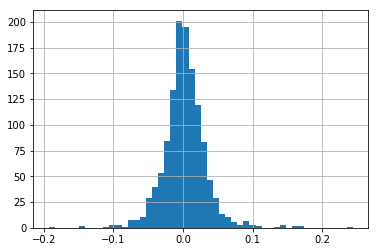

In [39]:
tesla['returns'].hist(bins=50)

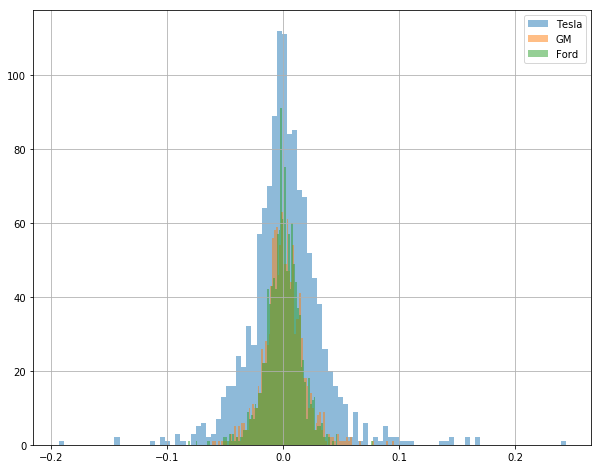

In [40]:
tesla['returns'].hist(bins=100,label='Tesla',figsize=(10,8),alpha=0.5)
gm['returns'].hist(bins=100,label='GM',alpha=0.5)
ford['returns'].hist(bins=100,label='Ford',alpha=0.5)
plt.legend()

** Probiere auch mal, ein KDE (kernel density estimate) anstelle eines Histogramms zu erstellen, um einen anderen Blickwinkel zu bekommen. Welche Aktie hat das breiteste Diagramm? **

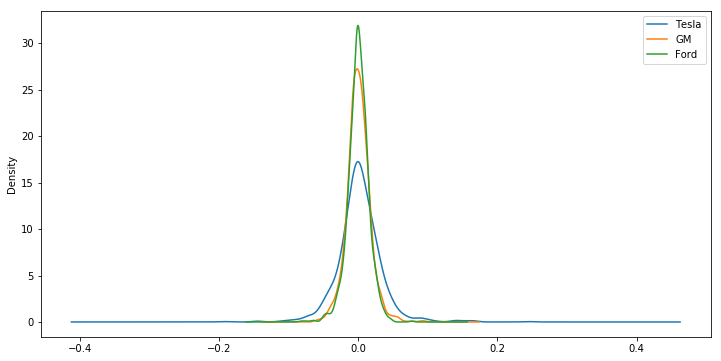

In [41]:
tesla['returns'].plot(kind='kde',label='Tesla',figsize=(12,6))
gm['returns'].plot(kind='kde',label='GM')
ford['returns'].plot(kind='kde',label='Ford')
plt.legend()

** Erstelle auch mal ein paar Boxplots, die die Renditen vergleichen.**

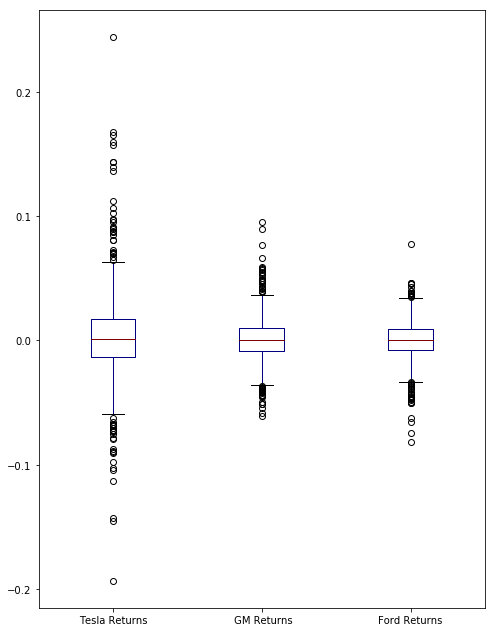

In [42]:
box_df = pd.concat([tesla['returns'],gm['returns'],ford['returns']],axis=1)
box_df.columns = ['Tesla Returns',' GM Returns','Ford Returns']
box_df.plot(kind='box',figsize=(8,11),colormap='jet')

## Tägliche Renditen von Aktien vergleichen

** Erstelle ein Streumatrixdiagramm, um die Korrelation zwischen den täglichen Renditen der einzelnen Aktieen zu sehen. Dies hilft bei der Beantwortung der Frage, wie zusammengehörig die Autokonzerne sind. Wird Tesla vom Markt eher als Technologieunternehmen behandelt als als Autokonzern? **

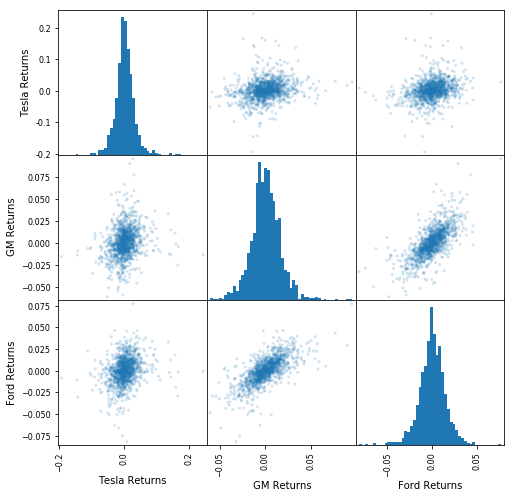

In [43]:
scatter_matrix(box_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

** Sieht so aus, als könnten Ford und GM irgendwie miteinander in Beziehung stehen. Stellen wir diese beiden gegeneinander in einem Streudiagramm dar, um uns das genauer anzusehen! **

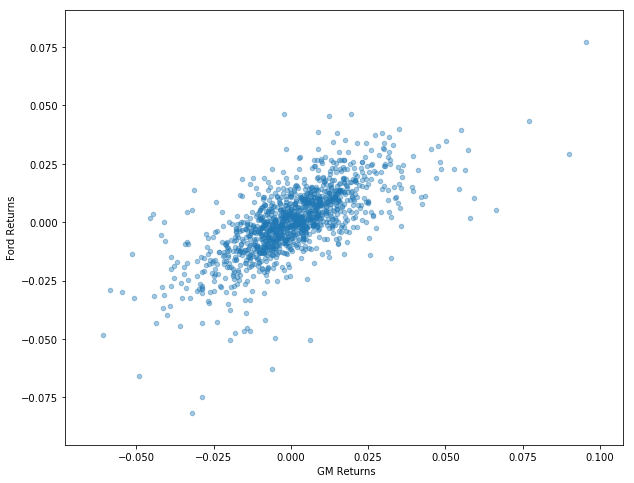

In [44]:
box_df.plot(kind='scatter',x=' GM Returns',y='Ford Returns',alpha=0.4,figsize=(10,8))

____
## Gesamte Tägliche Rendite (Cumulative Daily Returns)

Super! Jetzt können wir sehen, welche Aktie die größten Unterschiede bei den täglichen Renditen besitzt (Du solltest bemerkt haben, dass es Tesla ist; unser ursprüngliches Aktienpreisdiagramm hat das sicher offensichtlich gemacht).

Mit den gesamten täglichen Renditen untersuchen wir folgende Frage: Wenn ich am Anfang der Zeitreihe $1 in die Firma investiert hätte, wie viel wäre dieser Dollar dann heute wert? Das ist ein Unterschied zum bloßen Aktienpreis des aktuellen Tags, da es die tägliche Rendite mit berücksichtigt. Denk dran, unsere einfache Berechnung hier betrachtet nicht die Aktien, die eine Dividende zurückgeben. Sehen wir uns ein paar einfache Beispiele an:

Sagen wir es gibt eine Aktie 'ABC', die aktiv an einer Börse gehandelt wird. ABC hat an den gegeben Daten die folgenden Preise:

    Datum                        Preis
    01/01/2018                   10
    01/02/2018                   15
    01/03/2018                   20
    01/04/2018                   25

**Tägliche Rendite (Daily Return)** : Die tägliche Rendite ist der Profit/Verlust, den die Aktie im Vergleich zum Tag zuvor gemacht hat. (Das haben wir gerade weiter oben berechnet.) Ein Wert über eins bedeutet Profit, unter eins bedeutet Verlust. Er wird auch in Prozent angegeben, um die Information besser wiederzugeben. (Als Prozentwert bedeutet ein Wert über 0 Profit und ansonsten Verlust). Für das Beispiel oben wären die täglichen Renditen also

    Datum                      Tägliche Rückgabe                 %Tägliche Rückgabe 
    01/01/2018                 10/10 =  1                          -   
    01/02/2018                 15/10 =  3/2                       50%
    01/03/2018                 20/15 =  4/3                       33%
    01/04/2018                 25/20 =  5/4                       20%

**Gesamte Rendite (Cumulative Return)**: Während tägliche Renditen nützlich sind, geben sie dem Investor keine unmittelbare Einsicht in das, was er bis zu dem Datum verdient hat, besonders wenn die Aktie sehr unbeständig ist. Die gesamte Rendite wird relativ zum Tag der Investition berechnet. Wenn die gesamte Rendite über eins liegt, machst Du Profit, ansonsten Verlust. Für das obige Bespiel sind die gesamten Renditen also wie folgt

    Datum                       Gesamtrückgabe               %Gesamtrückgabe 
    01/01/2018                  10/10 =  1                         100 %   
    01/02/2018                  15/10 =  3/2                       150 %
    01/03/2018                  20/10 =  2                         200 %
    01/04/2018                  25/10 =  5/2                       250 %

Die Formel für eine gesamte tägliche Rendite ist:

$ i_i = (1+r_t) * i_{t-1} $

Hier sehen wir, dass wir einfach unsere vorherige Investition  i zum Zeitpunkt t-1 mit 1 + prozentualer Rendite multiplizieren. Pandas macht es sehr einfach, das zu berechnen und zwar mithilfe seiner Methode cumprod(). Man benutzt etwas in der folgenden Art: 

    df[daily_cumulative_return] = ( 1 + df[pct_daily_return] ).cumprod()
    
    

** Erstelle eine Spalte für die gesamte tägliche Rendite für das Datenframe jedes Automobilkonzerns.**

In [45]:
tesla['Cumulative Return'] = (1 + tesla['returns']).cumprod()

In [46]:
tesla.head()

Open   High    Low  Close   Volume  Total Traded   returns  \
Date                                                                      
2012-01-03  28.94  29.50  27.65  28.08   928052   26857824.88       NaN   
2012-01-04  28.21  28.67  27.50  27.71   630036   17773315.56 -0.013177   
2012-01-05  27.76  27.93  26.85  27.12  1005432   27910792.32 -0.021292   
2012-01-06  27.20  27.79  26.41  26.89   687081   18688603.20 -0.008481   
2012-01-09  27.00  27.49  26.12  27.25   896951   24217677.00  0.013388   

            Cumulative Return  
Date                           
2012-01-03                NaN  
2012-01-04           0.986823  
2012-01-05           0.965812  
2012-01-06           0.957621  
2012-01-09           0.970442

In [47]:
ford['Cumulative Return'] = (1 + ford['returns']).cumprod()
gm['Cumulative Return'] = (1 + gm['returns']).cumprod()

** Jetzt stelle die Gesamtrendite gegen den Zeitreihenindex dar. Welche Aktie zeigte die größte Rendite für einen investierten Dollar? Welche die niedrigsten?**

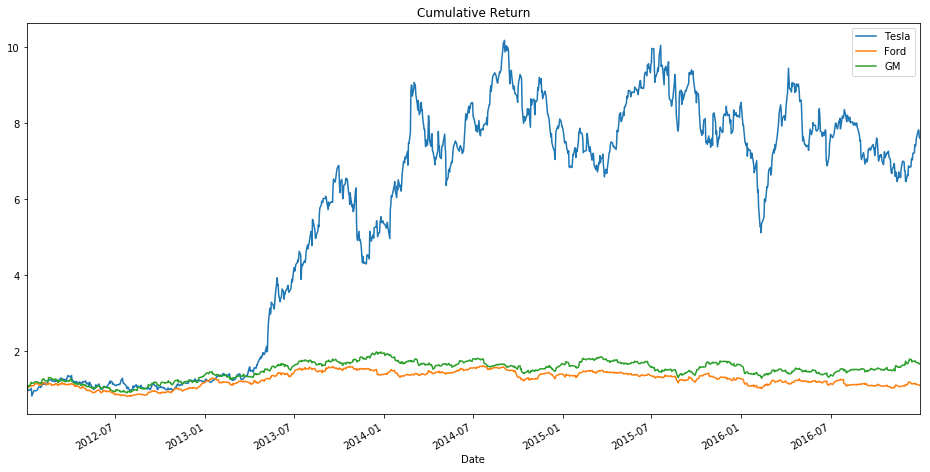

In [48]:
tesla['Cumulative Return'].plot(label='Tesla',figsize=(16,8),title='Cumulative Return')
ford['Cumulative Return'].plot(label='Ford')
gm['Cumulative Return'].plot(label='GM')
plt.legend()

# Super gemacht!

Das war's zu dieser sehr grundlegenden Analyse. Diese Hälfte des Kurses ist damit abgeschlossen, in der wir uns mehr auf das Erlernen der Methoden des Tradings konzentriert haben. In der zweiten Hälfte tauchen wir richtig in die Funktionalitäten ein, die für Zeitreihen, quantitative Analysen, Algorithmisches Trading und vieles mehr gedacht sind!